In [1]:
import sys
sys.path.append(r'C:\Users\Administrator\finstral-1') # Replace with your actual path


# Questrade Symbol Management Notebook

This notebook demonstrates how to use the `local_symbols.py` module to manage stock symbol data locally. The module provides functions for retrieving, storing, and working with stock symbol information from the Questrade API.

## Setup

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pathlib import Path
import json

In [3]:
# Import the local_symbols module
import src.local_symbols as local_symbols

In [4]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Exploring the Local Symbols Database

Let's first check if we have any symbols stored in our local database.


In [5]:
# Check current database contents
symbols = local_symbols.get_all_local_symbols()
print(f"Found {len(symbols)} symbols in the local database")

if len(symbols) > 0:
    # Display a sample of the symbols
    symbols_df = pd.DataFrame([{
        'Symbol': s['symbol'],
        'Company': s['description'],
        'Exchange': s['listingExchange'],
        'Security Type': s['securityType'],
        'Industry': s['industrySector']
    } for s in symbols])
    
    display(symbols_df.head(10))

Found 618 symbols in the local database


,Symbol,Company,Exchange,Security Type,Industry
0,BRK.B,BERKSHIRE HATHAWAY INC,NYSE,Stock,FinancialServices
1,LLY,ELI LILLY AND COMPANY,NYSE,Stock,Healthcare
2,XOM,EXXON MOBIL CORPORATION,NYSE,Stock,Energy
3,MA,MASTERCARD INCORPORATED,NYSE,Stock,FinancialServices
4,ABBV,ABBVIE INC,NYSE,Stock,Healthcare
5,BAC,BANK OF AMERICA CORPORATION,NYSE,Stock,FinancialServices
6,PM,PHILIP MORRIS INTERNATIONAL INC,NYSE,Stock,ConsumerDefensive
7,WFC,WELLS FARGO & COMPANY,NYSE,Stock,FinancialServices
8,ABT,ABBOTT LABORATORIES,NYSE,Stock,Healthcare
9,ORCL,ORACLE CORP,NYSE,Stock,Technology


## Saving a New Symbol

Let's fetch and save data for a new symbol. This demonstrates how the module retrieves symbol details from Questrade and stores them locally.

In [6]:
# Define a list of symbols to save
symbols_to_save = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Save each symbol
for symbol in symbols_to_save:
    try:
        symbol_data = local_symbols.save_local_symbol(symbol)
        print(f"Successfully saved {symbol} - {symbol_data['description']}")
    except Exception as e:
        print(f"Error saving {symbol}: {e}")

Symbol AAPL saved to local database
Successfully saved AAPL - APPLE INC
Symbol MSFT saved to local database
Successfully saved MSFT - MICROSOFT CORP
Symbol GOOGL saved to local database
Successfully saved GOOGL - ALPHABET INC
Symbol AMZN saved to local database
Successfully saved AMZN - AMAZON COM INC
Symbol TSLA saved to local database
Successfully saved TSLA - TESLA INC


## Retrieving Symbol Information

Now let's demonstrate how to retrieve symbol information from the local database.


In [7]:
# Retrieve a symbol
symbol_to_retrieve = 'AAPL'
symbol_data = local_symbols.get_local_symbol(symbol_to_retrieve)

# Convert to DataFrame for better display
symbol_df = pd.DataFrame([symbol_data])

# Display basic information
print(f"Symbol: {symbol_data['symbol']}")
print(f"Company: {symbol_data['description']}")
print(f"Exchange: {symbol_data['listingExchange']}")
print(f"Industry: {symbol_data['industryGroup']}")
print(f"Security Type: {symbol_data['securityType']}")
print(f"Currency: {symbol_data['currency']}")
print(f"Prev Close: ${symbol_data['prevDayClosePrice']:.2f}")
print(f"52-Week High: ${symbol_data['highPrice52']:.2f}")
print(f"52-Week Low: ${symbol_data['lowPrice52']:.2f}")
print(f"Average Volume (3M): {symbol_data['averageVol3Months']:,}")
print(f"Market Cap: ${symbol_data['marketCap']:,}")
print(f"EPS: ${symbol_data['eps']:.2f}")
if symbol_data['pe'] is not None:
    print(f"P/E Ratio: {symbol_data['pe']:.2f}")
print(f"Dividend: ${symbol_data['dividend']:.2f}")
print(f"Dividend Yield: {symbol_data['yield']:.2f}%")
print(f"Has Options: {symbol_data['hasOptions']}")

Symbol: AAPL
Company: APPLE INC
Exchange: NASDAQ
Industry: Undefined
Security Type: Stock
Currency: USD
Prev Close: $188.38
52-Week High: $260.10
52-Week Low: $164.07
Average Volume (3M): 54,526,494
Market Cap: $3,052,335,012,900
EPS: $6.30
P/E Ratio: 32.25
Dividend: $0.25
Dividend Yield: 0.49%
Has Options: True


Let's visualize some of the data to better understand the symbol's characteristics:


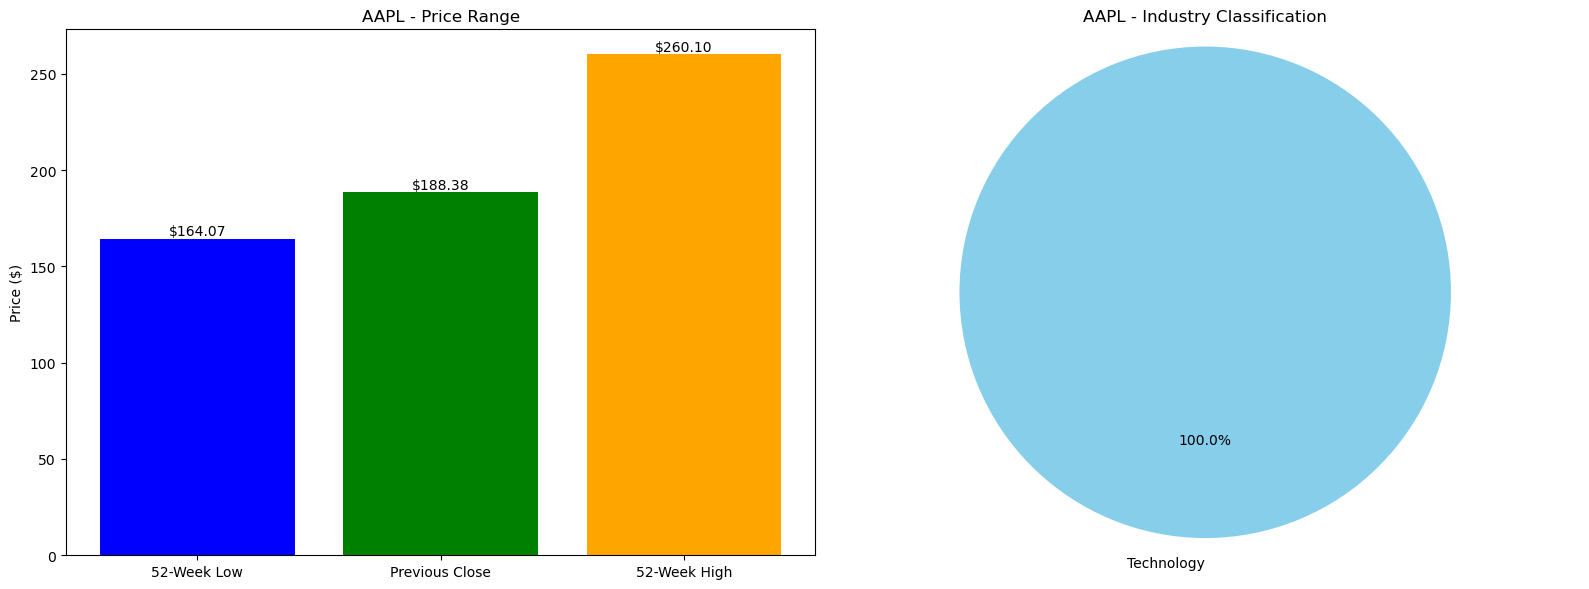


Trading Information:
------------------------------
Min Ticks:
  - Price: $N/A, Value: $N/A
  - Price: $N/A, Value: $N/A


In [8]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Price range visualization
price_data = {
    '52-Week Low': symbol_data['lowPrice52'],
    'Previous Close': symbol_data['prevDayClosePrice'],
    '52-Week High': symbol_data['highPrice52']
}
prices = list(price_data.values())
labels = list(price_data.keys())

# Bar chart for price range
ax1.bar(labels, prices, color=['blue', 'green', 'orange'])
ax1.set_title(f"{symbol_data['symbol']} - Price Range")
ax1.set_ylabel("Price ($)")
# Add price labels on top of bars
for i, price in enumerate(prices):
    ax1.text(i, price + 2, f"${price:.2f}", ha='center')

# Pie chart for industry categorization
industry_data = {
    'Sector': symbol_data['industrySector'],
    'Group': symbol_data['industryGroup'],
    'Subgroup': symbol_data['industrySubgroup']
}
ax2.axis('equal')
ax2.pie([1], labels=[industry_data['Sector']], autopct='%1.1f%%', 
       startangle=90, colors=['skyblue'])
ax2.set_title(f"{symbol_data['symbol']} - Industry Classification")

plt.tight_layout()
plt.show()

# Display more details about ticks and trading information
print("\nTrading Information:")
print("-" * 30)
print(f"Min Ticks:")
for tick in symbol_data['minTicks']:
    print(f"  - Price: ${tick.get('price', 'N/A')}, Value: ${tick.get('value', 'N/A')}")


## Forcing Data Update

The `get_local_symbol` function has a `force_update` parameter that allows us to refresh the data from the Questrade API.


In [9]:
# Get the latest data from the API
updated_symbol_data = local_symbols.get_local_symbol('AAPL', force_update=True)

# Check what fields might have changed
print("Updated Symbol Data:")
print(f"Previous Day Close: ${updated_symbol_data['prevDayClosePrice']:.2f}")
print(f"Market Cap: ${updated_symbol_data['marketCap']:,}")

# Display the timestamp of the last update
import sqlite3
from pathlib import Path

db_path = Path('../data/symbols.db')
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
cursor.execute('SELECT last_updated FROM symbols WHERE symbol = ?', ('AAPL',))
last_updated = cursor.fetchone()[0]
conn.close()

print(f"Last Updated: {last_updated}")


Symbol AAPL saved to local database
Updated Symbol Data:
Previous Day Close: $188.38
Market Cap: $3,052,335,012,900
Last Updated: 2025-04-06 17:53:49


## Importing Symbols from a CSV File

The module provides a function to import multiple symbols from a CSV file. Let's demonstrate this with a sample CSV file. First, we'll create a sample CSV file with some symbols:


In [10]:
# Create a sample CSV file with some Dow Jones Industrial Average symbols
csv_content = """Company,Symbol
Apple Inc.,AAPL
Microsoft Corporation,MSFT
Amazon.com Inc.,AMZN
Alphabet Inc.,GOOGL
Tesla Inc.,TSLA
Meta Platforms Inc.,META
Nvidia Corporation,NVDA
JP Morgan Chase & Co.,JPM
Johnson & Johnson,JNJ
Visa Inc.,V
"""

csv_path = "../lists/sample_symbols.csv"
os.makedirs(os.path.dirname(csv_path), exist_ok=True)
with open(csv_path, "w") as f:
    f.write(csv_content)

print(f"Created sample CSV file at {csv_path}")

Created sample CSV file at ../lists/sample_symbols.csv


Now let's import the symbols from this file:


In [11]:
# Import symbols from the CSV file
imported_count = local_symbols.import_symbols_from_csv(csv_path)
print(f"Successfully imported {imported_count} symbols")

# Verify the imported symbols
all_symbols = local_symbols.get_all_local_symbols()
print(f"Total symbols in database: {len(all_symbols)}")

# Display all symbols in the database
all_symbols_df = pd.DataFrame([{
    'Symbol': s['symbol'],
    'Company': s['description'],
    'Exchange': s['listingExchange'],
    'Security Type': s['securityType'],
    'Industry': s.get('industrySector', 'N/A')
} for s in all_symbols])

display(all_symbols_df)

Symbol AAPL saved to local database
Symbol MSFT saved to local database
Symbol AMZN saved to local database
Symbol GOOGL saved to local database
Symbol TSLA saved to local database
Symbol META saved to local database
Symbol NVDA saved to local database
Symbol JPM saved to local database
Symbol JNJ saved to local database
Symbol V saved to local database
Successfully imported 10 symbols
Total symbols in database: 618


,Symbol,Company,Exchange,Security Type,Industry
0,BRK.B,BERKSHIRE HATHAWAY INC,NYSE,Stock,FinancialServices
1,LLY,ELI LILLY AND COMPANY,NYSE,Stock,Healthcare
2,XOM,EXXON MOBIL CORPORATION,NYSE,Stock,Energy
3,MA,MASTERCARD INCORPORATED,NYSE,Stock,FinancialServices
4,ABBV,ABBVIE INC,NYSE,Stock,Healthcare
...,...,...,...,...,...
613,META,META PLATFORMS INC,NASDAQ,Stock,CommunicationServices
614,NVDA,NVIDIA CORP,NASDAQ,Stock,Technology
615,JPM,JPMORGAN CHASE & CO.,NYSE,Stock,FinancialServices
616,JNJ,JOHNSON & JOHNSON,NYSE,Stock,Healthcare


## Advanced Symbol Analysis

Now that we have several symbols in our database, let's perform some analysis on them.


,Symbol,Company,Price,Market Cap (B),P/E,EPS,Dividend Yield,52W High,52W Low,Volume (3M),Industry,Exchange
608,AAPL,APPLE INC,188.38,3052.335013,32.25238,6.30,0.49215,260.10,164.0750,54526494,Technology,NASDAQ
609,MSFT,MICROSOFT CORP,359.84,2773.693112,30.06527,12.41,0.88982,468.35,359.4800,23589449,Technology,NASDAQ
614,NVDA,NVIDIA CORP,94.31,2483.920000,34.62585,2.94,0.03929,153.13,75.6060,284419826,Technology,NASDAQ
610,AMZN,AMAZON COM INC,171.00,1890.740894,32.26221,5.53,0.00000,242.52,151.6100,42543678,ConsumerCyclical,NASDAQ
613,META,META PLATFORMS INC,504.73,1164.193653,22.28080,23.86,0.39502,740.91,414.5000,16918185,CommunicationServices,NASDAQ
...,...,...,...,...,...,...,...,...,...,...,...,...
525,TSLS,DIREXION SHARES ETF TRUST DAILY TSLA BEAR 1X SHS,11.91,0.066836,NaN,NaN,4.16243,31.83,6.8181,12065461,None,NASDAQ
563,SBIT,PROSHARES TRUST ULTRASHORT BITCOIN ETF,12.41,0.065591,NaN,NaN,0.93836,56.56,8.5900,6698020,None,ARCA
509,LABD,DIREXION SHARES ETF TRUST DAILY S&P BIOTECH BE...,12.20,0.044153,NaN,NaN,3.16715,12.33,4.7800,16638965,None,ARCA
486,NVDQ,ETF OPPORTUNITIES TR T REX 2X INVERSE NVIDIA D...,4.84,0.038788,NaN,NaN,3.61149,18.75,2.4400,56231102,None,BATS


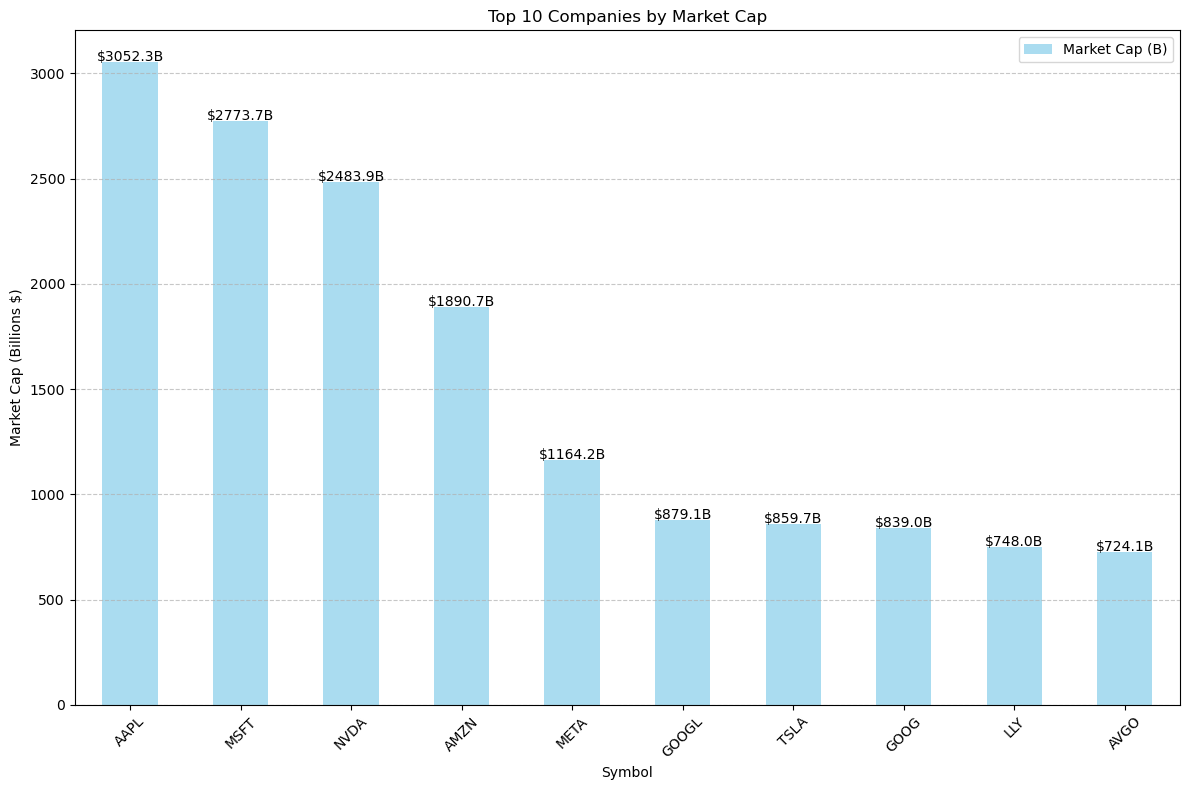

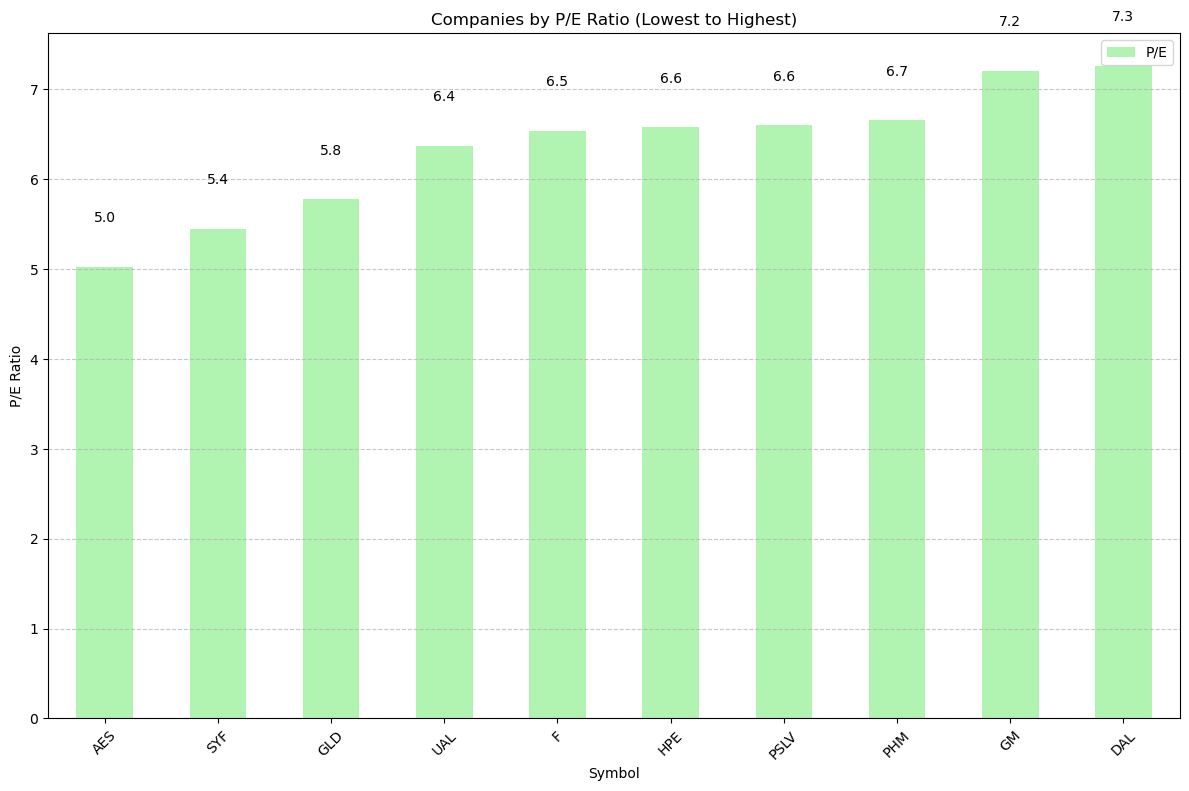

In [12]:
# Get all symbols from the database
symbols = local_symbols.get_all_local_symbols()

# Create a DataFrame with key metrics
metrics_df = pd.DataFrame([{
    'Symbol': s['symbol'],
    'Company': s['description'],
    'Price': s['prevDayClosePrice'],
    'Market Cap (B)': s['marketCap'] / 1_000_000_000 if s['marketCap'] else None,
    'P/E': s['pe'],
    'EPS': s['eps'],
    'Dividend Yield': s['yield'],
    '52W High': s['highPrice52'],
    '52W Low': s['lowPrice52'],
    'Volume (3M)': s['averageVol3Months'],
    'Industry': s['industrySector'] if 'industrySector' in s else 'N/A',
    'Exchange': s['listingExchange']
} for s in symbols])

# Sort by market cap
metrics_df = metrics_df.sort_values('Market Cap (B)', ascending=False)

# Display the metrics
display(metrics_df)

# Create a visualization of market caps
plt.figure(figsize=(12, 8))
bar_plot = metrics_df.head(10).plot(
    kind='bar', 
    x='Symbol', 
    y='Market Cap (B)', 
    color='skyblue', 
    alpha=0.7,
    title='Top 10 Companies by Market Cap',
    ax=plt.gca()
)
plt.ylabel('Market Cap (Billions $)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, v in enumerate(metrics_df.head(10)['Market Cap (B)']):
    plt.text(i, v + 5, f"${v:.1f}B", ha='center')

plt.tight_layout()
plt.show()

# Plot P/E ratio comparison
valid_pe = metrics_df[metrics_df['P/E'].notna()].sort_values('P/E')
if not valid_pe.empty:
    plt.figure(figsize=(12, 8))
    bar_plot = valid_pe.head(10).plot(
        kind='bar', 
        x='Symbol', 
        y='P/E', 
        color='lightgreen', 
        alpha=0.7,
        title='Companies by P/E Ratio (Lowest to Highest)',
        ax=plt.gca()
    )
    plt.ylabel('P/E Ratio')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels on top of bars
    for i, v in enumerate(valid_pe.head(10)['P/E']):
        if not pd.isna(v):
            plt.text(i, v + 0.5, f"{v:.1f}", ha='center')

    plt.tight_layout()
    plt.show()


## Industry Sector Analysis

Let's analyze the distribution of industry sectors in our dataset.


In [13]:
symbols

[{'symbol': 'BRK.B',
  'symbolId': 9991,
  'prevDayClosePrice': 493.54,
  'highPrice52': 539,
  'lowPrice52': 395.661,
  'averageVol3Months': 4667339,
  'averageVol20Days': 5582868,
  'outstandingShares': 1339906000,
  'eps': 61900,
  'pe': 20.43793,
  'dividend': 0,
  'yield': 0,
  'exDate': None,
  'marketCap': 710364373600,
  'tradeUnit': 1,
  'optionType': None,
  'optionDurationType': None,
  'optionRoot': '',
  'optionContractDeliverables': {'underlyings': [], 'cashInLieu': 0},
  'optionExerciseType': None,
  'listingExchange': 'NYSE',
  'description': 'BERKSHIRE HATHAWAY INC',
  'securityType': 'Stock',
  'optionExpiryDate': None,
  'dividendDate': None,
  'optionStrikePrice': None,
  'isTradable': True,
  'isQuotable': True,
  'hasOptions': True,
  'currency': 'USD',
  'minTicks': [{'pivot': 0, 'minTick': 0.0001}, {'pivot': 1, 'minTick': 0.01}],
  'industrySector': 'FinancialServices',
  'industryGroup': 'Undefined',
  'industrySubgroup': 'Undefined'},
 {'symbol': 'LLY',
  'sym

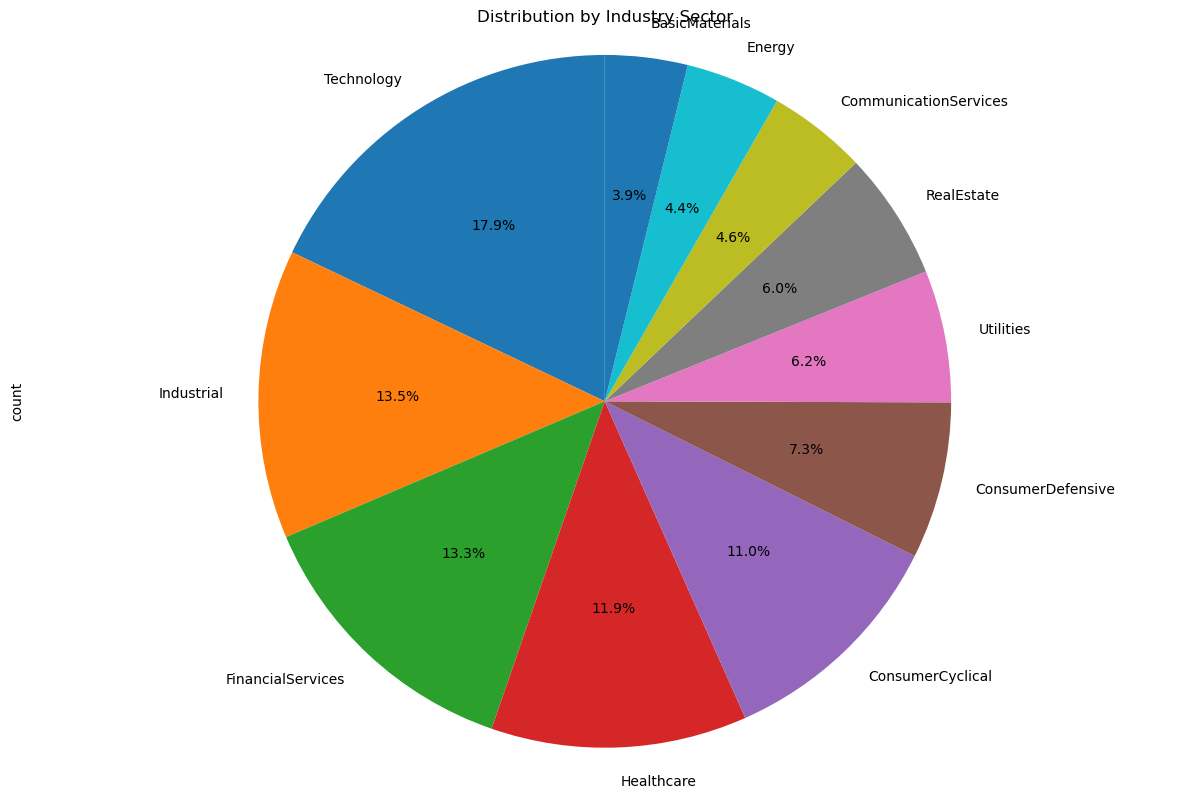

,Price,Market Cap (B),P/E,Dividend Yield,Count
Industry,,,,,
CommunicationServices,144.680000,192.057115,407.186557,1.460790,24
Technology,194.982258,160.125200,49.630488,0.941775,93
ConsumerCyclical,437.368772,94.308629,24.663896,1.534808,57
FinancialServices,180.024058,94.140980,19.314563,2.238715,69
Healthcare,211.116452,91.031384,54.740398,1.147921,62
ConsumerDefensive,102.658684,88.053959,23.878928,2.928072,38
Energy,120.578696,72.774574,22.573956,3.016375,23
Industrial,212.829429,50.131586,27.082071,1.500457,70
BasicMaterials,143.120000,42.068506,27.664383,2.647790,20


In [14]:
# Check if we have industry data
if 'Industry' in metrics_df.columns:
    # Create industry analysis
    industry_counts = metrics_df['Industry'].value_counts()
    
    # Plot industry distribution
    plt.figure(figsize=(12, 8))
    industry_counts.plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        shadow=False,
        title='Distribution by Industry Sector'
    )
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    # Show average metrics by industry
    industry_metrics = metrics_df.groupby('Industry').agg({
        'Price': 'mean',
        'Market Cap (B)': 'mean',
        'P/E': 'mean',
        'Dividend Yield': 'mean',
        'Symbol': 'count'
    }).rename(columns={'Symbol': 'Count'}).sort_values('Market Cap (B)', ascending=False)
    
    display(industry_metrics)


## Searching for Symbol Information

Let's create a simple function to search for symbols in our database.


In [16]:
def search_symbols(keyword):
    """
    Search for symbols in the local database that match the keyword.
    
    Args:
        keyword (str): Keyword to search for in symbol or description
        
    Returns:
        pd.DataFrame: Matching symbols
    """
    all_symbols = local_symbols.get_all_local_symbols()
    matching_symbols = []
    
    for s in all_symbols:
        if (keyword.upper() in s['symbol'].upper() or 
            keyword.upper() in s['description'].upper()):
            matching_symbols.append({
                'Symbol': s['symbol'],
                'Company': s['description'],
                'Price': s['prevDayClosePrice'],
                'Market Cap (B)': s['marketCap'] / 1_000_000_000 if s['marketCap'] else None,
                'Industry': s.get('industrySector', 'N/A'),
                'Exchange': s['listingExchange']
            })
    
    return pd.DataFrame(matching_symbols)

# Example searches
search_terms = ['TECH', 'BANK', 'AUTO']

for term in search_terms:
    results = search_symbols(term)
    if not results.empty:
        print(f"\nResults for '{term}':")
        display(results)
    else:
        print(f"\nNo results found for '{term}'")



Results for 'TECH':


,Symbol,Company,Price,Market Cap (B),Industry,Exchange
0,UBER,UBER TECHNOLOGIES INC,64.62,146.074379,Technology,NYSE
1,TT,TRANE TECHNOLOGIES PLC,318.11,74.249281,Industrial,NYSE
2,LHX,L3 HARRIS TECHNOLOGIES INC,202.06,39.409169,Industrial,NYSE
3,A,AGILENT TECHNOLOGIES INC,103.00,31.267215,Healthcare,NYSE
4,WAB,WESTINGHOUSE AIR BRAKE TECH CORP,160.95,29.655821,Industrial,NYSE
5,DELL,DELL TECHNOLOGIES INC,71.63,27.703201,Technology,NYSE
6,KEYS,KEYSIGHT TECHNOLOGIES INC,127.02,23.455571,Technology,NYSE
7,TYL,TYLER TECHNOLOGIES INC,538.24,24.556943,Technology,NYSE
8,TDY,TELEDYNE TECHNOLOGIES INC,436.57,22.088470,Technology,NYSE
9,STX,SEAGATE TECHNOLOGY HOLDINGS PLC,66.73,15.143430,Technology,NASDAQ



Results for 'BANK':


,Symbol,Company,Price,Market Cap (B),Industry,Exchange
0,BAC,BANK OF AMERICA CORPORATION,34.39,283.046088,FinancialServices,NYSE
1,BK,BANK OF NEW YORK MELLON CORP,73.31,57.373296,FinancialServices,NYSE
2,MTB,M & T BANK CORP,157.02,26.838471,FinancialServices,NYSE



Results for 'AUTO':


,Symbol,Company,Price,Market Cap (B),Industry,Exchange
0,AZO,AUTOZONE INC,3653.24,64.006351,ConsumerCyclical,NYSE
1,ROK,ROCKWELL AUTOMATION INC,227.11,27.042526,Industrial,NYSE
2,ORLY,OREILLY AUTOMOTIVE INC NEW,1389.87,82.534523,ConsumerCyclical,NASDAQ
3,ADSK,AUTODESK INC,245.51,54.772950,Technology,NASDAQ
4,ADP,AUTOMATIC DATA PROCESSING INC,286.13,124.254302,Technology,NASDAQ


## Conclusion

In this notebook, we've explored the functionality of the `local_symbols.py` module, which allows us to:

1. Save symbol data from Questrade to a local SQLite database
2. Retrieve symbol information from the local database
3. Force updates of symbol data when needed
4. Import multiple symbols from a CSV file
5. Perform analysis on the symbols in our database

This local database approach provides several advantages:
- Reduces API calls to Questrade's servers
- Provides faster access to symbol information
- Allows for offline analysis of symbol data
- Enables batch processing of multiple symbols

The module is particularly useful for applications that need to repeatedly access symbol information, such as portfolio analysis tools, screeners, or algorithmic trading systems.